# Dataset information

****importing essential libraries****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset**

In [38]:
df= pd.read_csv(r"heart_failure_clinical_records_dataset.csv")

**looking at the dataset**

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
df.info() # checking the dtypes detail

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Missing Values**

In [5]:
df.isna().sum() #number of missing values for each feature

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

**description of the dataset** 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


**detecting outliers**

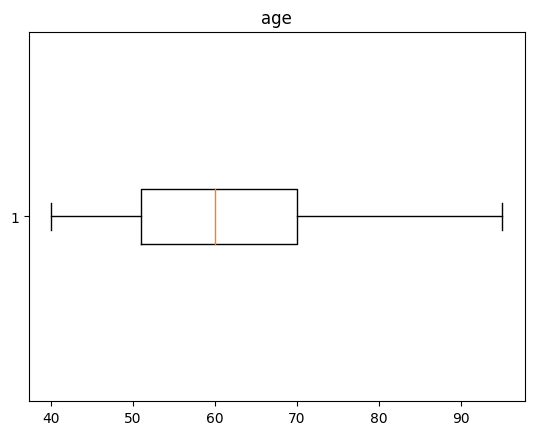

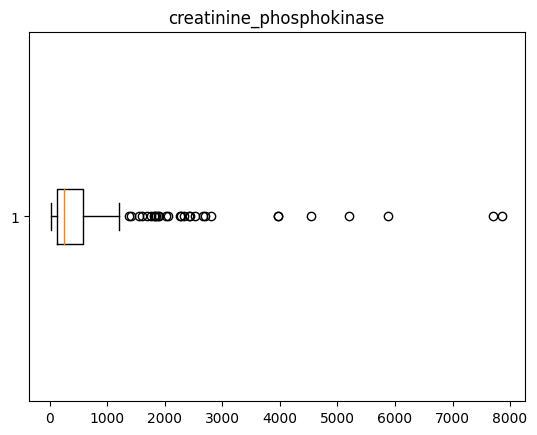

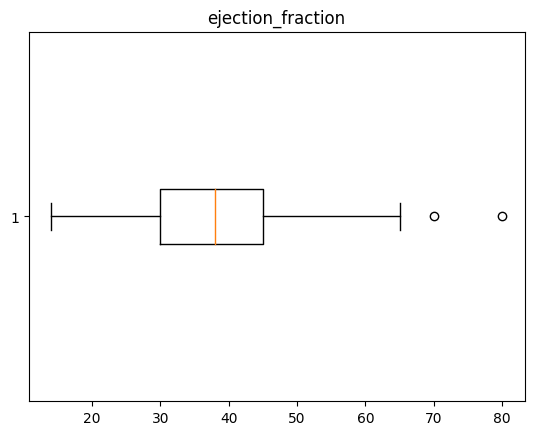

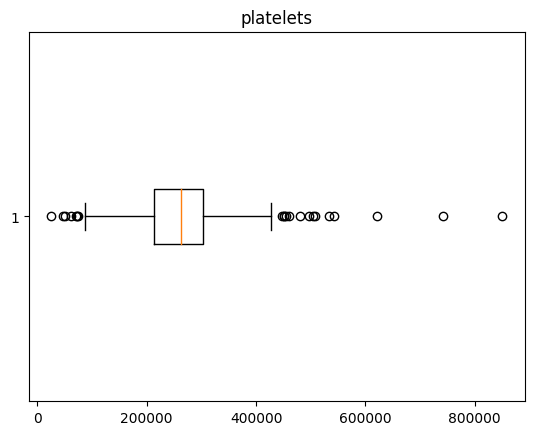

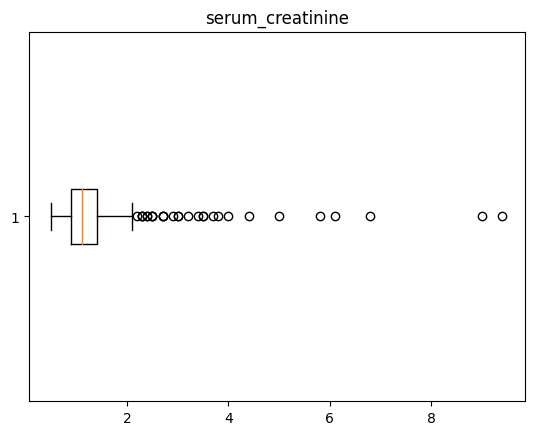

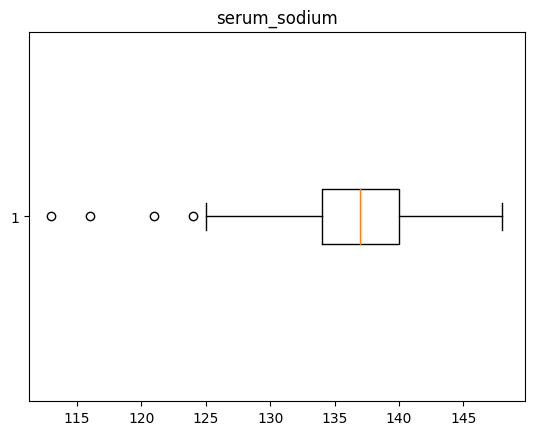

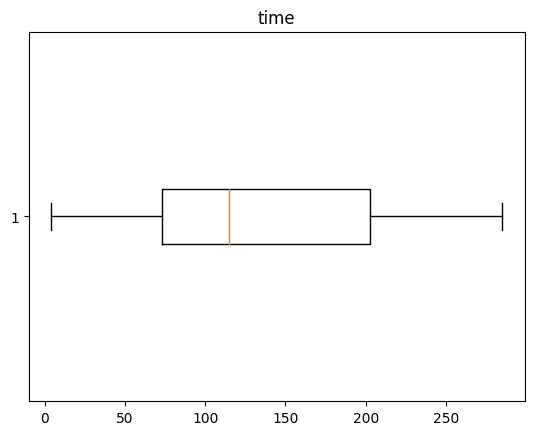

In [7]:
numerical= ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time'] #numerical_features

#creating boxplot for every numerical feature

for col in df[numerical]:
    plt.boxplot(df[col], vert= False)
    plt.title(col)
    plt.show()

**removing outliers**

In [8]:
def remove_outliers(df):
    for col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

df= remove_outliers(df)


**distribution of features**

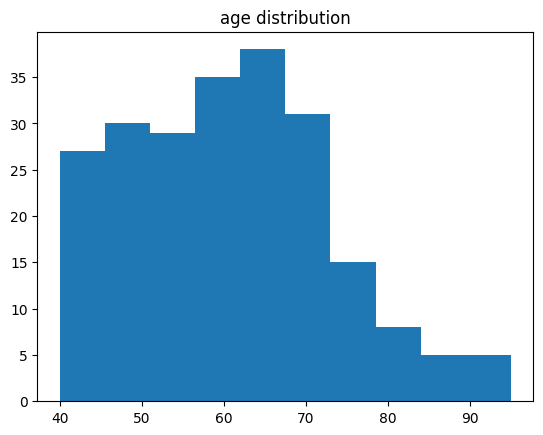

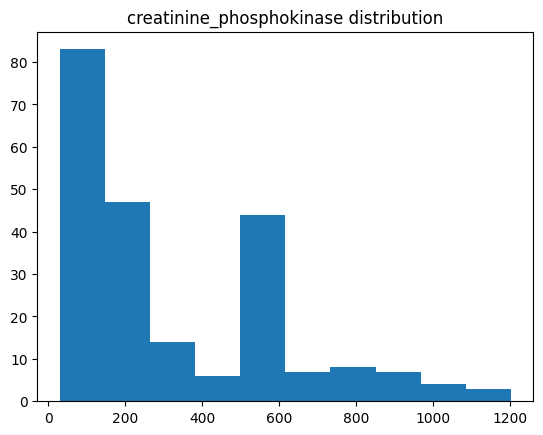

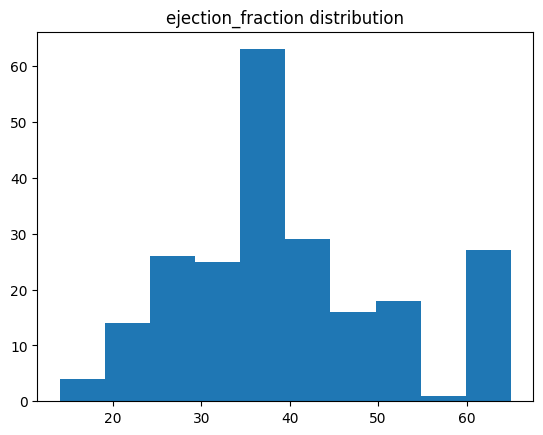

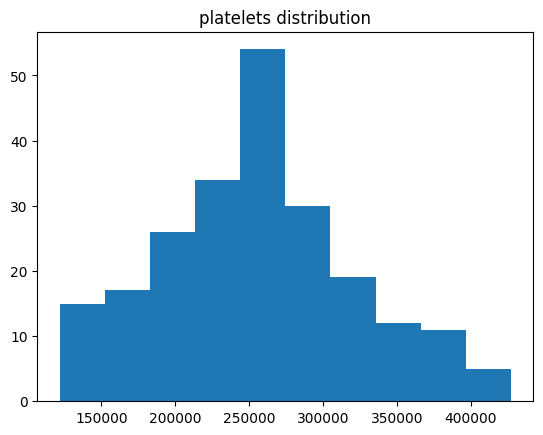

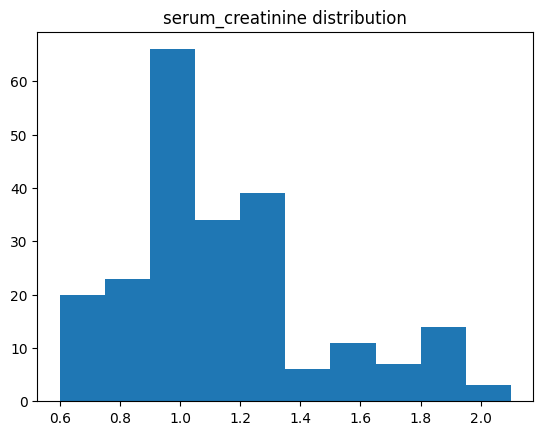

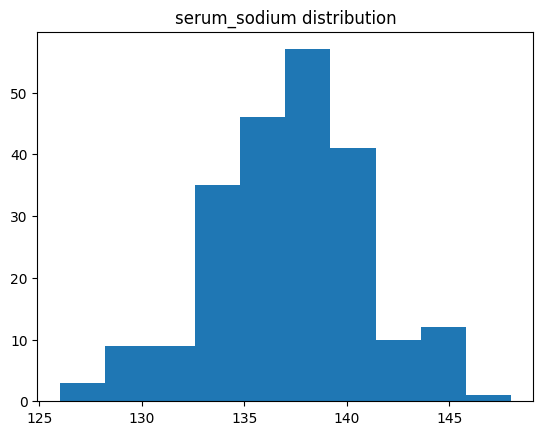

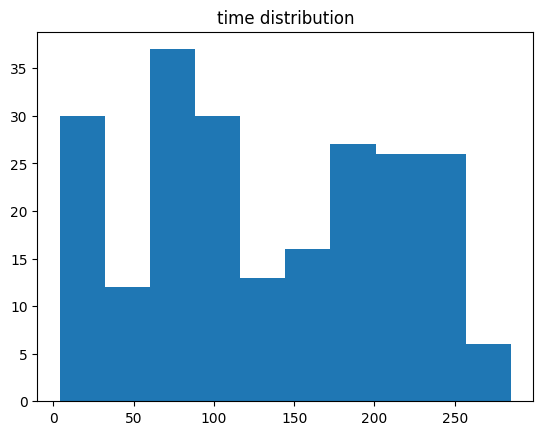

In [9]:
# distribution of numerical features

for i in numerical:
    plt.hist(df[i])
    plt.title(i + ' distribution')
    plt.show()

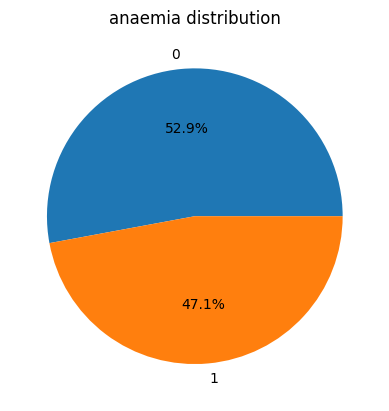

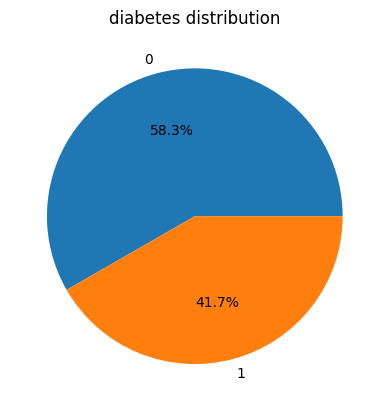

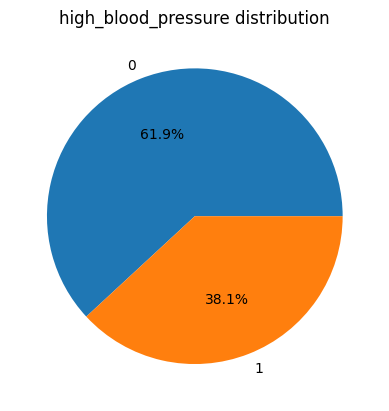

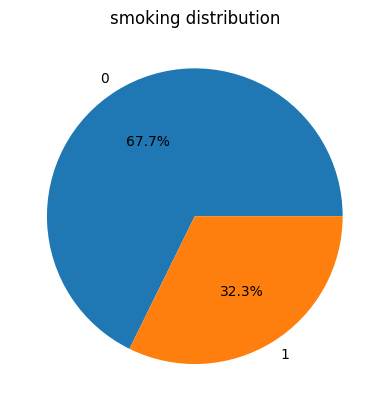

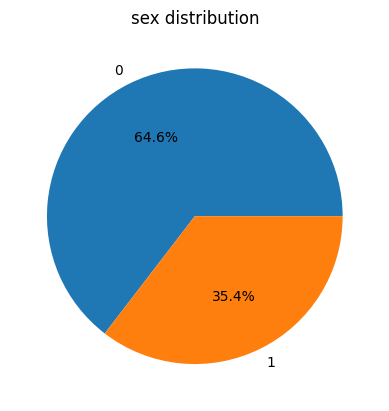

In [10]:
# distribution of categorical features

categorical_features= ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'sex']

for i in categorical_features:
    plt.pie(df[i].value_counts(), autopct='%1.1f%%', labels=[0,1])
    plt.title(i + ' distribution')
    plt.show()

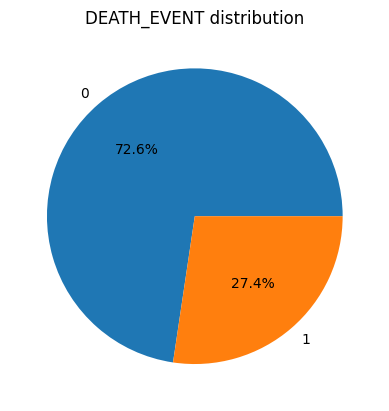

In [11]:
# distribution of target variable

plt.pie(df['DEATH_EVENT'].value_counts(), autopct='%1.1f%%', labels=[0,1])
plt.title( 'DEATH_EVENT distribution')
plt.show()


# Exploratory Data Analysis

**numerical features VS target feature**

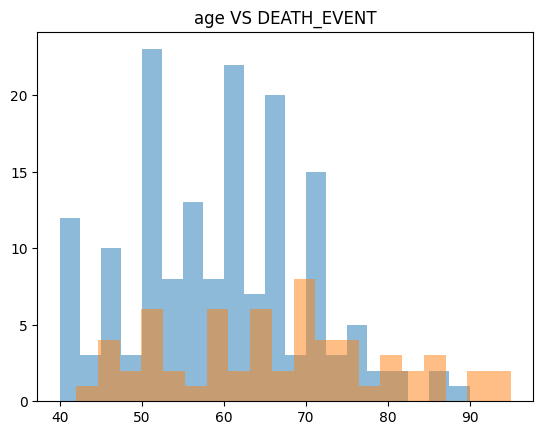

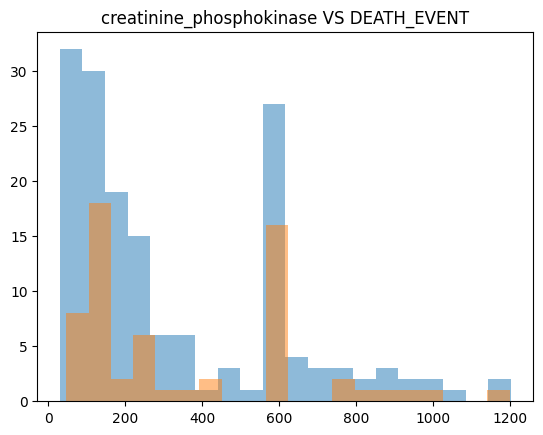

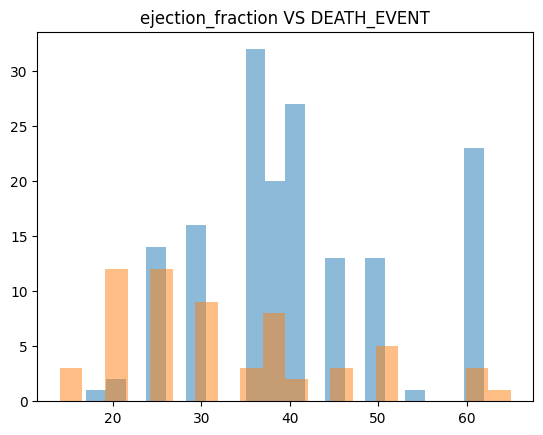

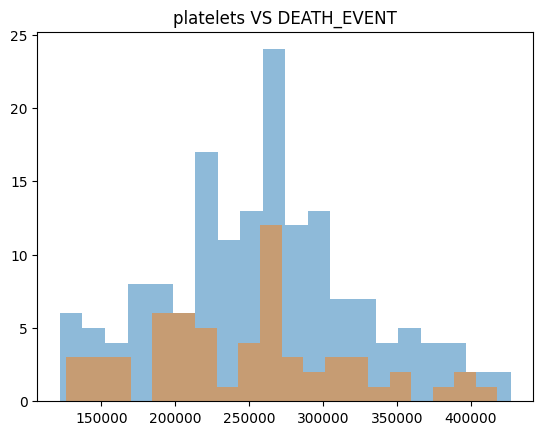

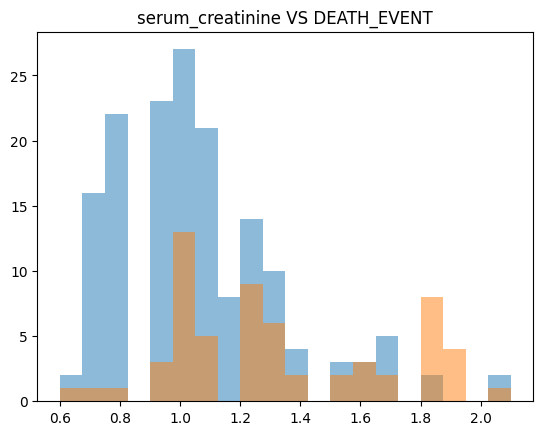

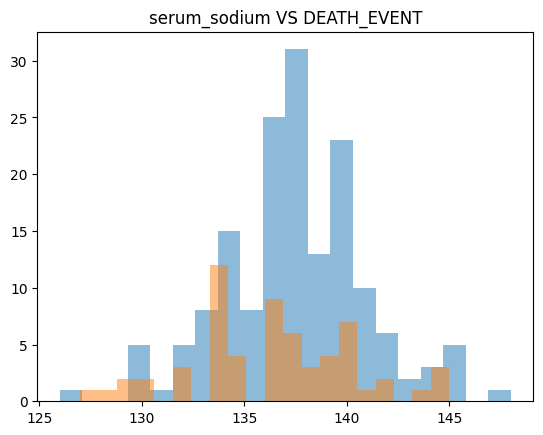

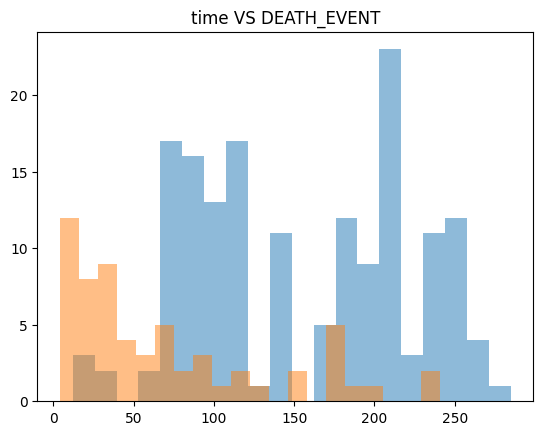

In [12]:
for i in numerical:
    plt.hist(df[df['DEATH_EVENT'] == 0][i], bins=20, alpha=0.5)
    plt.hist(df[df['DEATH_EVENT'] == 1][i], bins=20, alpha=0.5)
    plt.title(f'{i} VS DEATH_EVENT')
    plt.show()

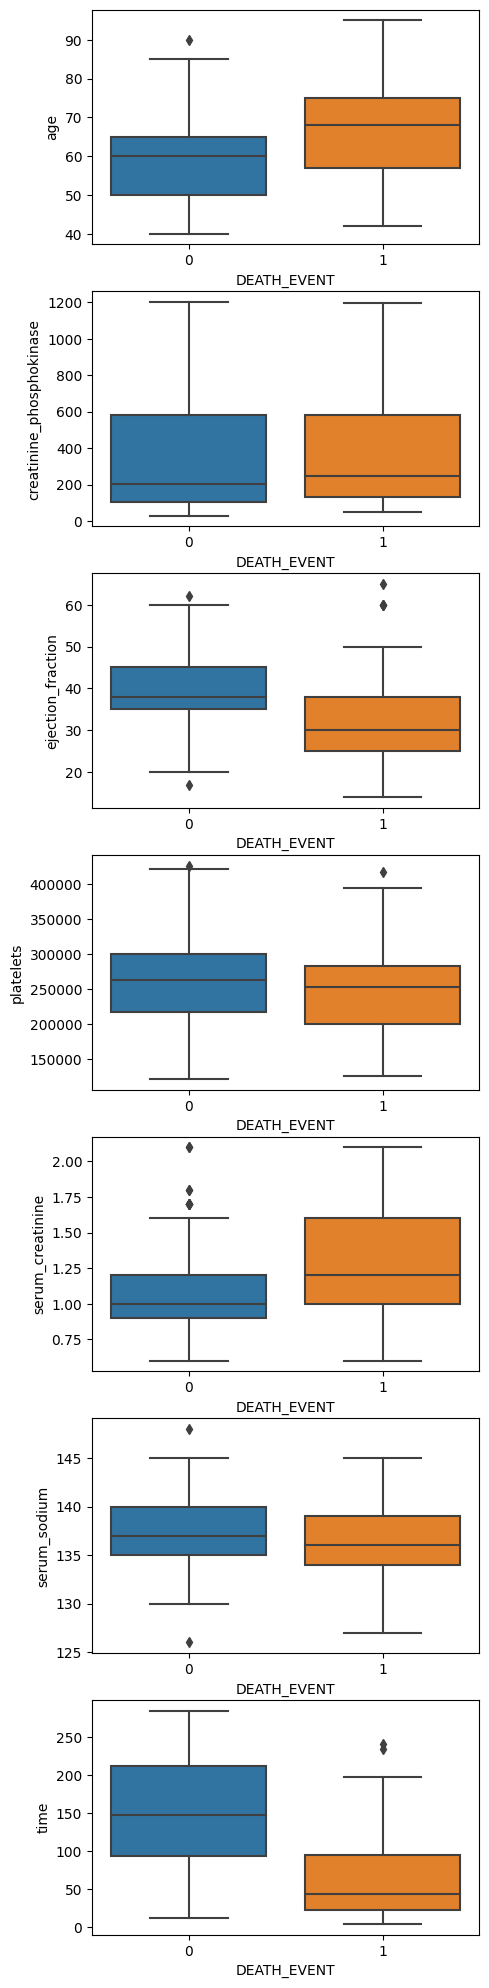

In [13]:
index = 0
plt.figure(figsize=(5,25))
for feature in numerical:
    index += 1
    plt.subplot(7, 1, index)
    sns.boxplot(x='DEATH_EVENT', y=feature, data=df)

**insights**:

1. Cases of **DEATH_EVENT** start **after the age of 40**. Some specific peaks of high cases of DEATH_EVENT can be observed at **45, 50, 60, 65, 70, 75, 80 and 90**. Also, the ratio of unsurvived/survived increases dramatically after the age of **70**.
2. High cases of **DEATH_EVENT** can be observed for **ejaction_fraction under 40%**.
3. **serum_creatinine** values **higher than 1.2** have higher probability to lead to **DEATH_EVENT**.
4. people with **serum_sodium** values **127 - 145** are more prone to **DEATH_EVENT** due to heart failure.
5. **platelets** range from **2x10^5 - 3x10^5** indicate more chance of heart failure.
6. **time** in the range of **25 - 100** is a strong indicator of for **DEATH_EVENT**.

**categorical features VS target feature**

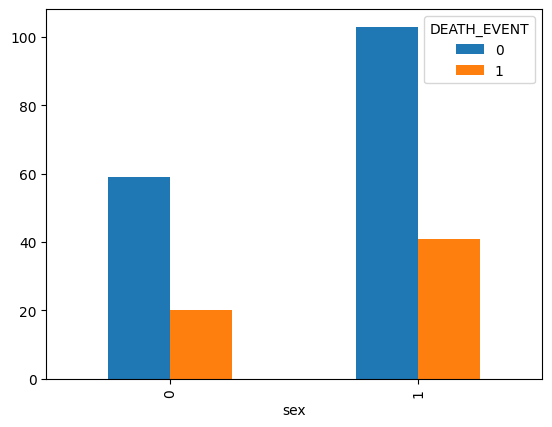

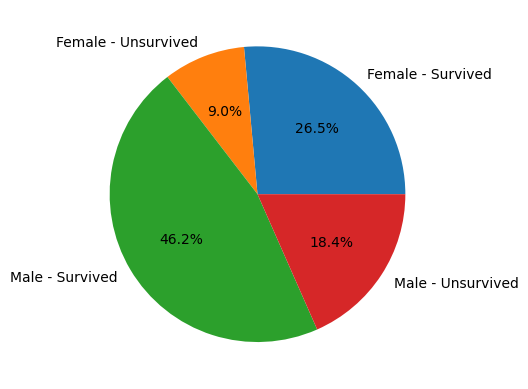

In [14]:
grouped_sex= df.groupby(['sex', 'DEATH_EVENT']).size()
grouped_sex.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_sex, labels=['Female - Survived', 'Female - Unsurvived', 'Male - Survived', 'Male - Unsurvived'], autopct='%1.1f%%')
plt.show()


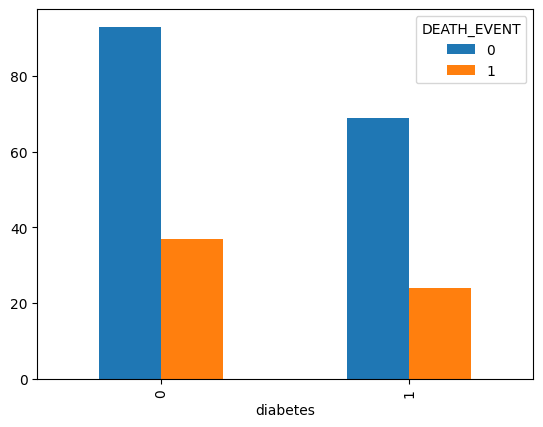

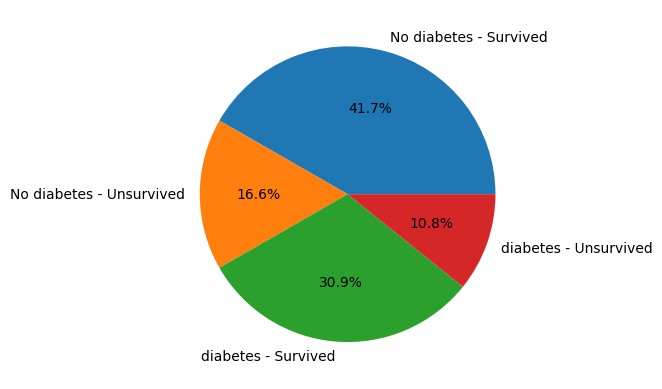

In [15]:
grouped_diabetes= df.groupby(['diabetes', 'DEATH_EVENT']).size()
grouped_diabetes.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_diabetes, labels=['No diabetes - Survived', 'No diabetes - Unsurvived', 'diabetes - Survived', 'diabetes - Unsurvived'], autopct='%1.1f%%')
plt.show()

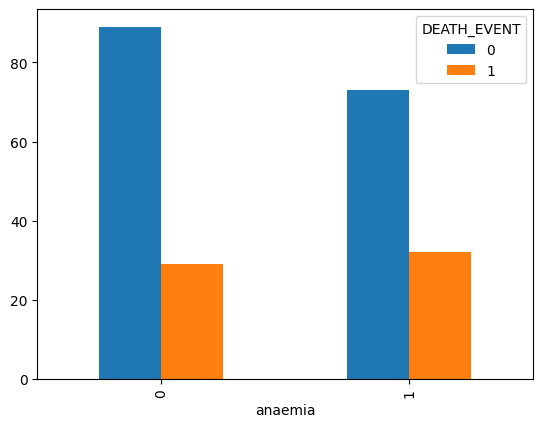

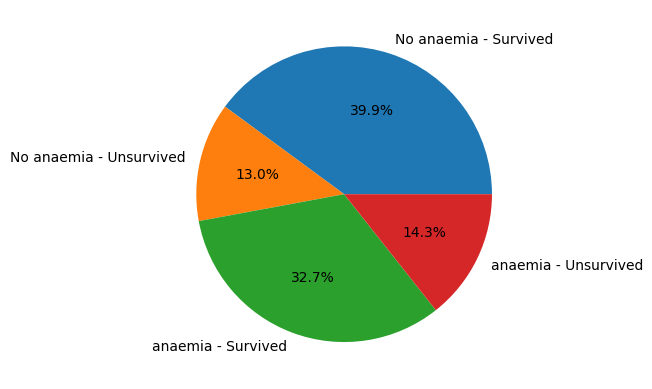

In [16]:
grouped_anaemia= df.groupby(['anaemia', 'DEATH_EVENT']).size()
grouped_anaemia.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_anaemia, labels=['No anaemia - Survived', 'No anaemia - Unsurvived', 'anaemia - Survived', 'anaemia - Unsurvived'], autopct='%1.1f%%')
plt.show()

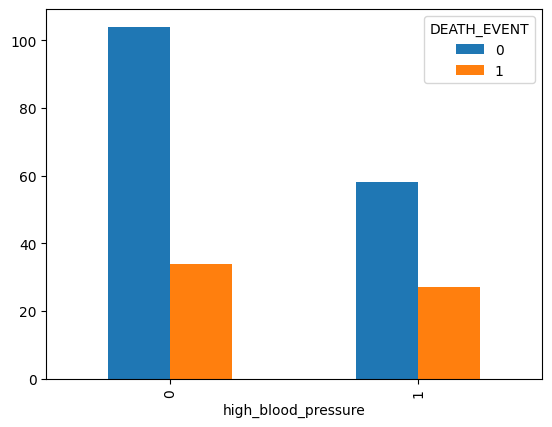

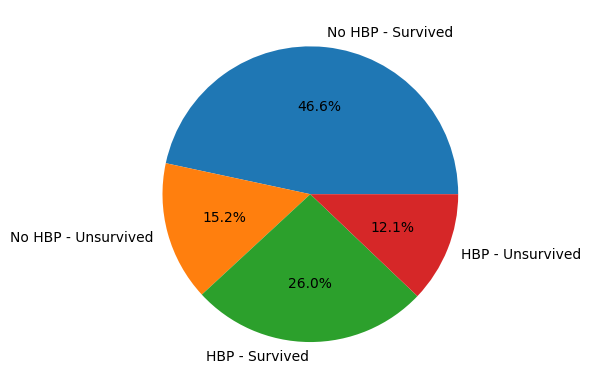

In [17]:
grouped_high_blood_pressure= df.groupby(['high_blood_pressure', 'DEATH_EVENT']).size()
grouped_high_blood_pressure.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_high_blood_pressure, labels=['No HBP - Survived', 'No HBP - Unsurvived', 'HBP - Survived', 'HBP - Unsurvived'], autopct='%1.1f%%')
plt.show()

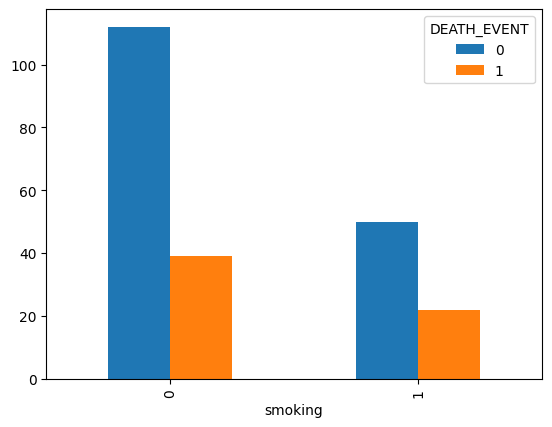

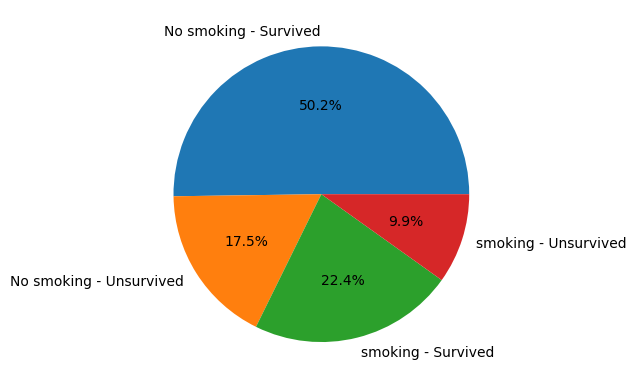

In [18]:
grouped_smoking= df.groupby(['smoking', 'DEATH_EVENT']).size()
grouped_smoking.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_smoking, labels=['No smoking - Survived', 'No smoking - Unsurvived', 'smoking - Survived', 'smoking - Unsurvived'], autopct='%1.1f%%')
plt.show()

**insights:**

1. There are more cases of **male** population confronting a **DEATH_EVENT** due to heart failure than **female** population.
2. People with **high blood pressure** are more prone to **heart failure**.
3. By using this dataset we can not prove diabetes, anaemia and smoking lead to heart failure, despite medical facts. This may be due to low size of dataset.

**correlation matrix**

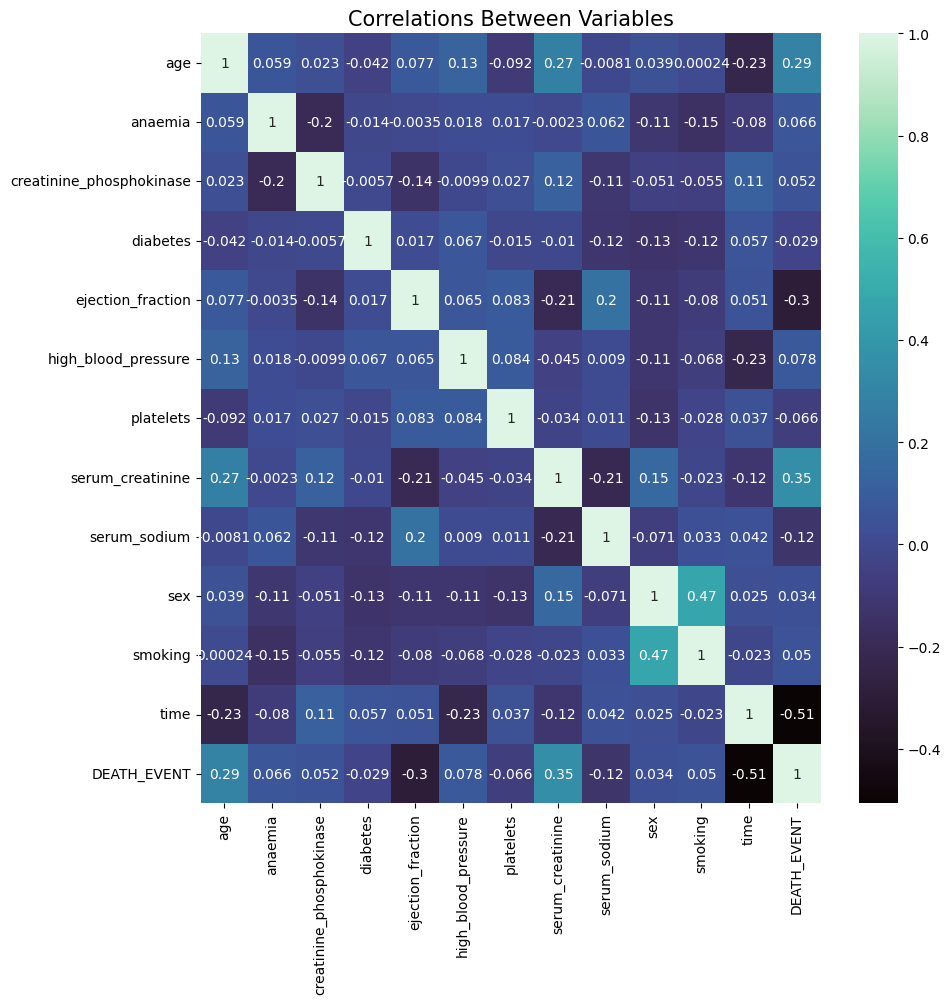

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="mako")
plt.title("Correlations Between Variables",size=15)
plt.show()

# Machine learning models

**independent and dependent variables**

In [20]:
x= df.iloc[:,:-1]
y= df.iloc[:,-1]

**Train, Test splitting**

In [21]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

**standardizing data**

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [23]:
accuracy_list= []

**Logistic Regression**

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        28
           1       1.00      0.71      0.83        17

    accuracy                           0.89        45
   macro avg       0.92      0.85      0.87        45
weighted avg       0.91      0.89      0.88        45



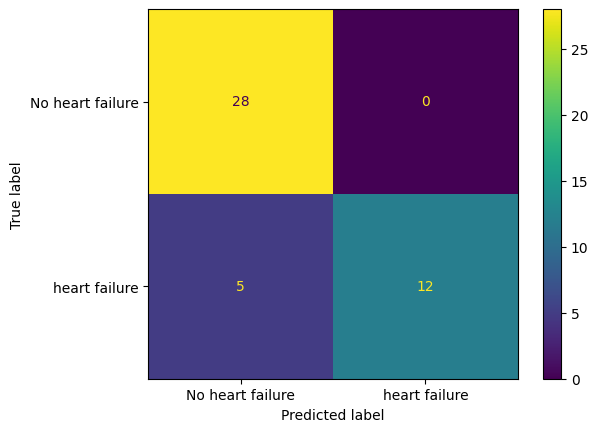

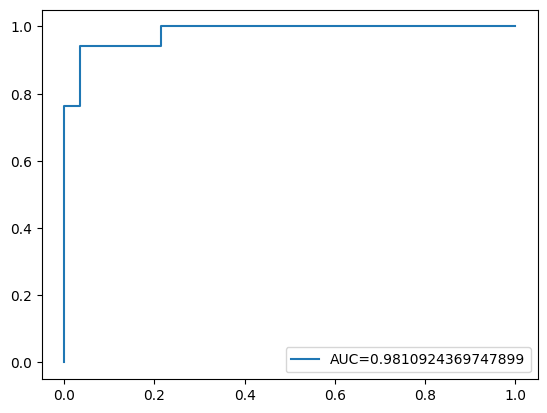

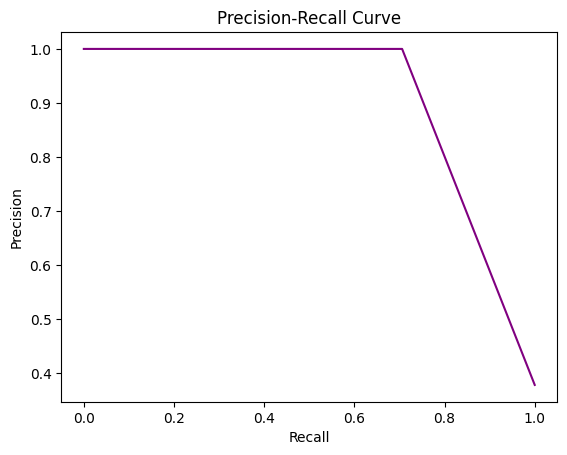

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve

#implementation

log_reg = LogisticRegression(random_state=1)
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

#evaluation

log_reg_acc = accuracy_score(y_test, y_pred)
accuracy_list.append(100*log_reg_acc)
print(classification_report(y_test, y_pred))

# confusion matrix

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

# ROC curve

y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# precision recall curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, color='purple')
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

**SVC**

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        28
           1       1.00      0.76      0.87        17

    accuracy                           0.91        45
   macro avg       0.94      0.88      0.90        45
weighted avg       0.92      0.91      0.91        45



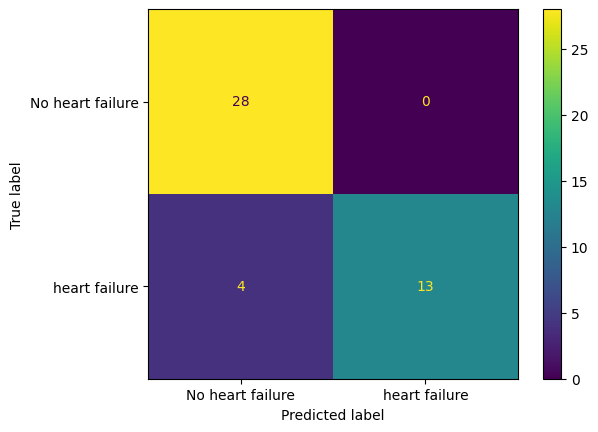

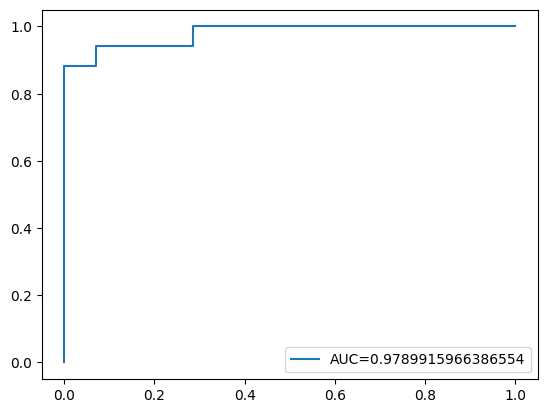

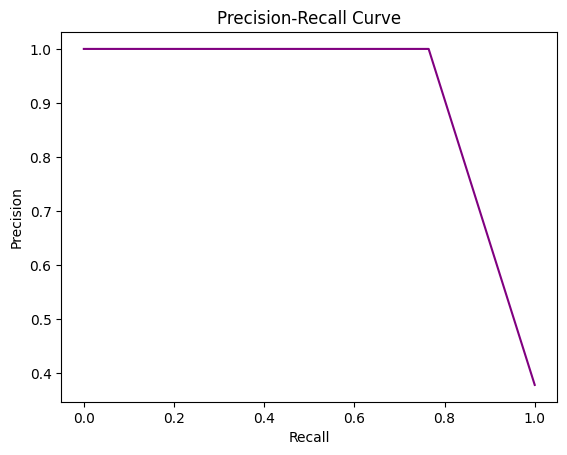

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc_curve

# implementation

sv_clf = SVC(C =0.7, kernel= 'linear', random_state=1, probability= True)
sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)

# evaluation

sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100* sv_clf_acc)
print(classification_report(y_test, sv_clf_pred))

# confusion matrix

cm = confusion_matrix(y_test, sv_clf_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

# ROC curve

y_pred_proba = sv_clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# precision recall curve

precision, recall, thresholds = precision_recall_curve(y_test, sv_clf_pred)
plt.plot(recall, precision, color='purple')
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

**K Neighbors Classifier**

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        28
           1       1.00      0.41      0.58        17

    accuracy                           0.78        45
   macro avg       0.87      0.71      0.72        45
weighted avg       0.84      0.78      0.75        45



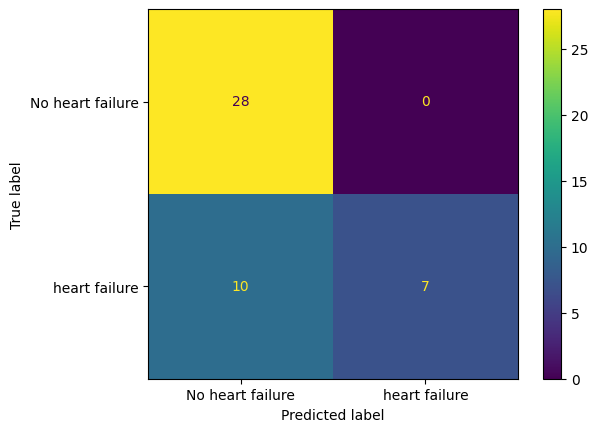

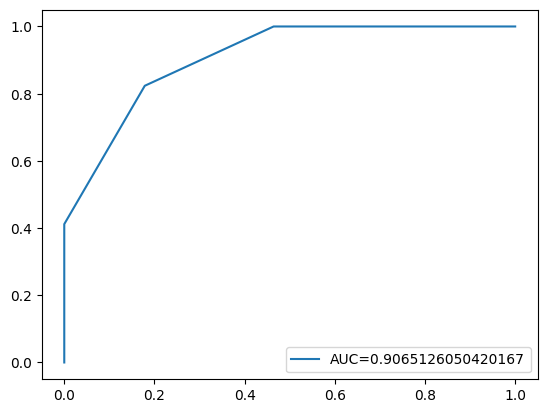

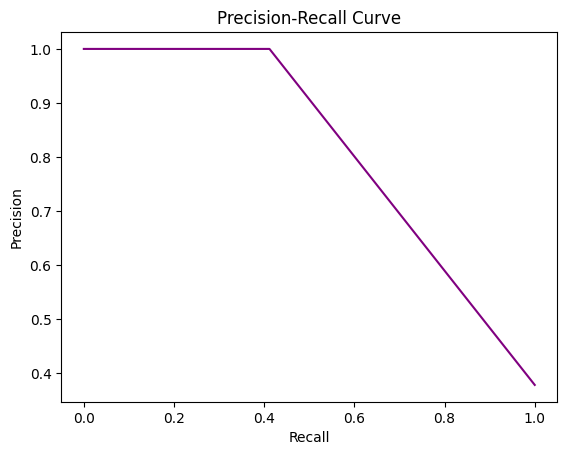

In [26]:
# implementation

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

kn_clf = KNeighborsClassifier(n_neighbors=5)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)

# evaluation

kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)
print(classification_report(y_test, kn_pred))

# confusion matrix

cm = confusion_matrix(y_test, kn_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

# ROC curve

y_pred_proba = kn_clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# precision recall curve

precision, recall, thresholds = precision_recall_curve(y_test, kn_pred)
plt.plot(recall, precision, color='purple')
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

**Decision Tree Classifier**

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        28
           1       0.80      0.71      0.75        17

    accuracy                           0.82        45
   macro avg       0.82      0.80      0.81        45
weighted avg       0.82      0.82      0.82        45



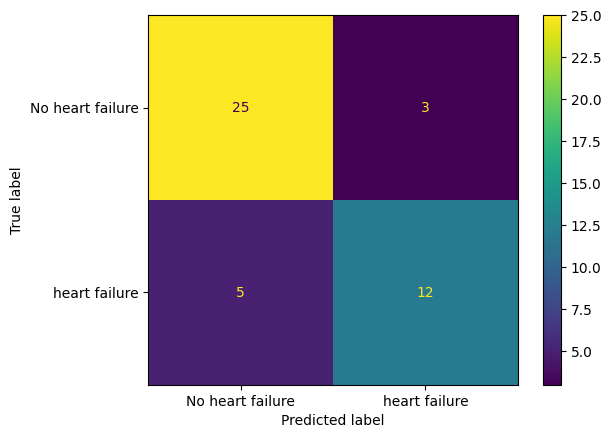

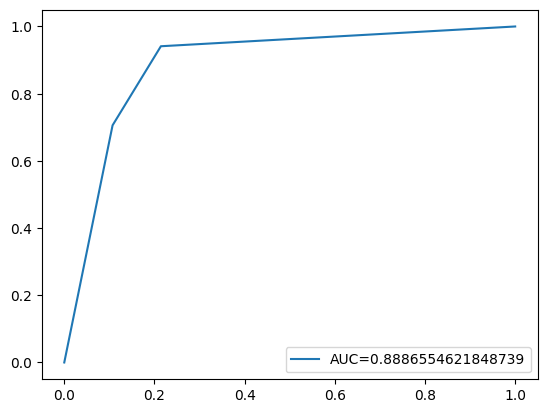

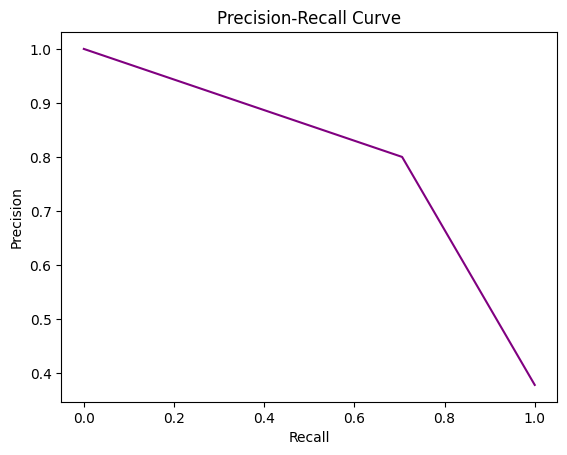

In [27]:
from sklearn.tree import DecisionTreeClassifier

# implementation

dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=1, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)

# evaluation

dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)
print(classification_report(y_test, dt_pred))

# confusion matrix

cm = confusion_matrix(y_test, dt_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

# ROC curve

y_pred_proba = dt_clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# precision recall curve

precision, recall, thresholds = precision_recall_curve(y_test, dt_pred)
plt.plot(recall, precision, color='purple')
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

**Random Forest Classifier**

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.81      0.76      0.79        17

    accuracy                           0.84        45
   macro avg       0.84      0.83      0.83        45
weighted avg       0.84      0.84      0.84        45



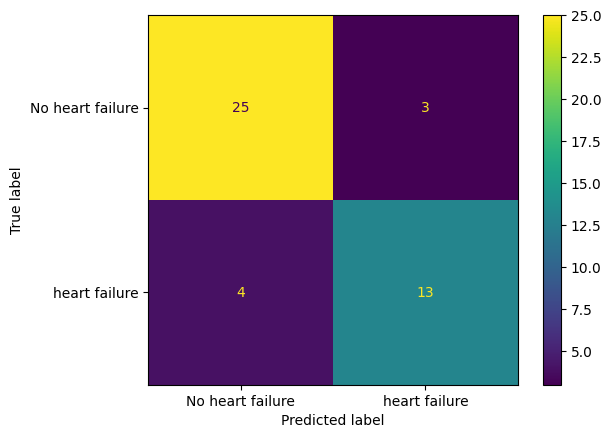

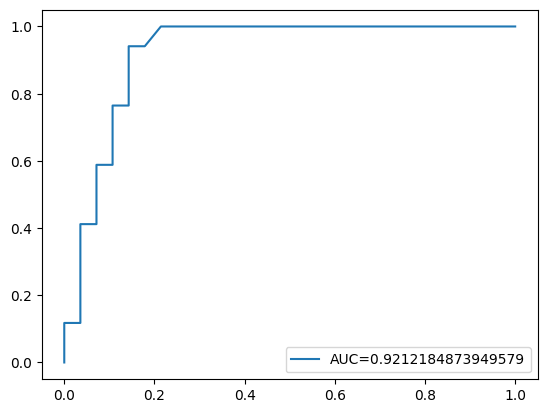

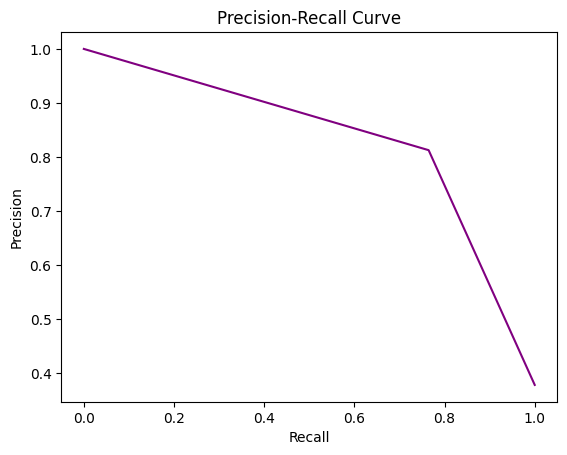

In [28]:
# implementation

from sklearn.ensemble import RandomForestClassifier

r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)

# evaluation

r_clf_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_clf_acc)
print(classification_report(y_test, r_pred))

# confusion matrix

cm = confusion_matrix(y_test, r_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

# ROC curve

y_pred_proba = r_clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# precision recall curve

precision, recall, thresholds = precision_recall_curve(y_test, r_pred)
plt.plot(recall, precision, color='purple')
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

**Gradient Boosting Classifier**

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        28
           1       0.86      0.71      0.77        17

    accuracy                           0.84        45
   macro avg       0.85      0.82      0.83        45
weighted avg       0.85      0.84      0.84        45



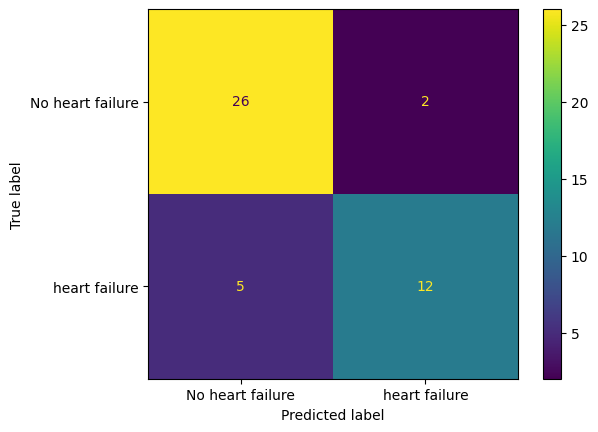

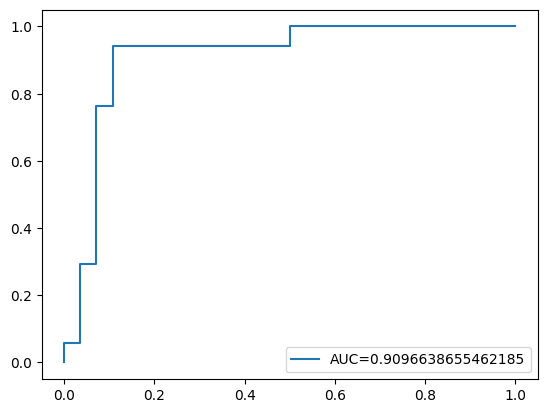

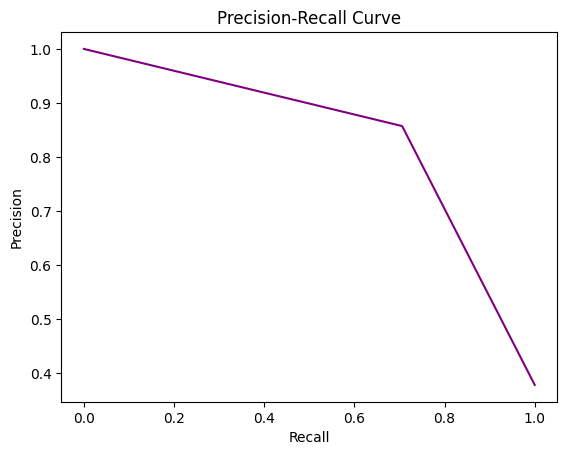

In [29]:
# implementation

from sklearn.ensemble import GradientBoostingClassifier

gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(x_train,y_train)
gradientboost_pred = gradientboost_clf.predict(x_test)

# evaluation

gradientboost_clf_acc = accuracy_score(y_test, gradientboost_pred)
accuracy_list.append(100*gradientboost_clf_acc)
print(classification_report(y_test, gradientboost_pred))

# confusion matrix

cm = confusion_matrix(y_test, gradientboost_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

# ROC curve

y_pred_proba = gradientboost_clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# precision recall curve

precision, recall, thresholds = precision_recall_curve(y_test, gradientboost_pred)
plt.plot(recall, precision, color='purple')
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

**Xgboost Classifier**

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        28
           1       0.80      0.71      0.75        17

    accuracy                           0.82        45
   macro avg       0.82      0.80      0.81        45
weighted avg       0.82      0.82      0.82        45



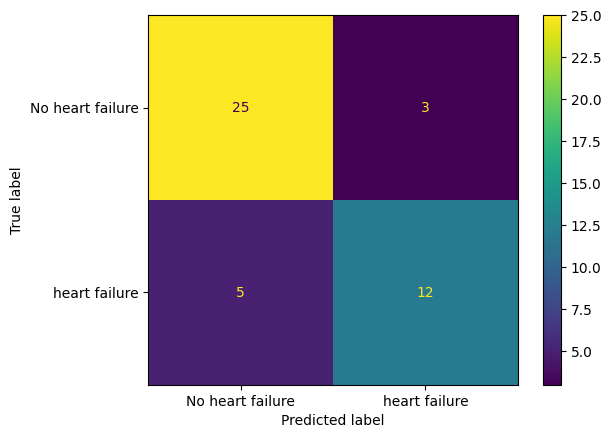

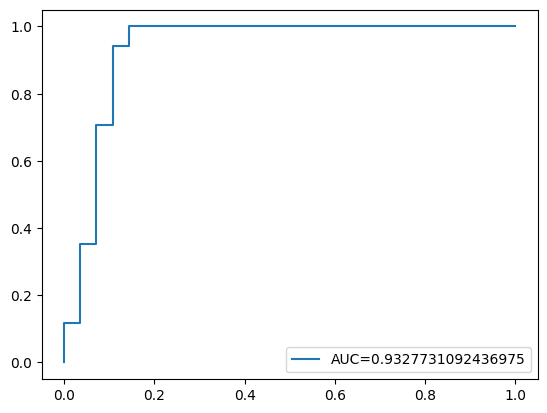

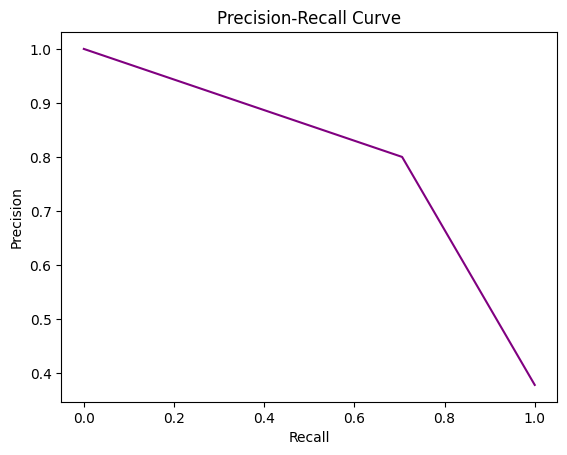

In [30]:
# implementation

import xgboost

xgb_clf = xgboost.XGBRFClassifier(max_depth=3, random_state=1)
xgb_clf.fit(x_train,y_train)
xgb_pred = xgb_clf.predict(x_test)

# evaluation

xgb_clf_acc = accuracy_score(y_test, xgb_pred)
accuracy_list.append(100*xgb_clf_acc)
print(classification_report(y_test, xgb_pred))

# confusion matrix

cm = confusion_matrix(y_test, xgb_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

# ROC curve

y_pred_proba = xgb_clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# precision recall curve

precision, recall, thresholds = precision_recall_curve(y_test, xgb_pred)
plt.plot(recall, precision, color='purple')
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

# Comparing models

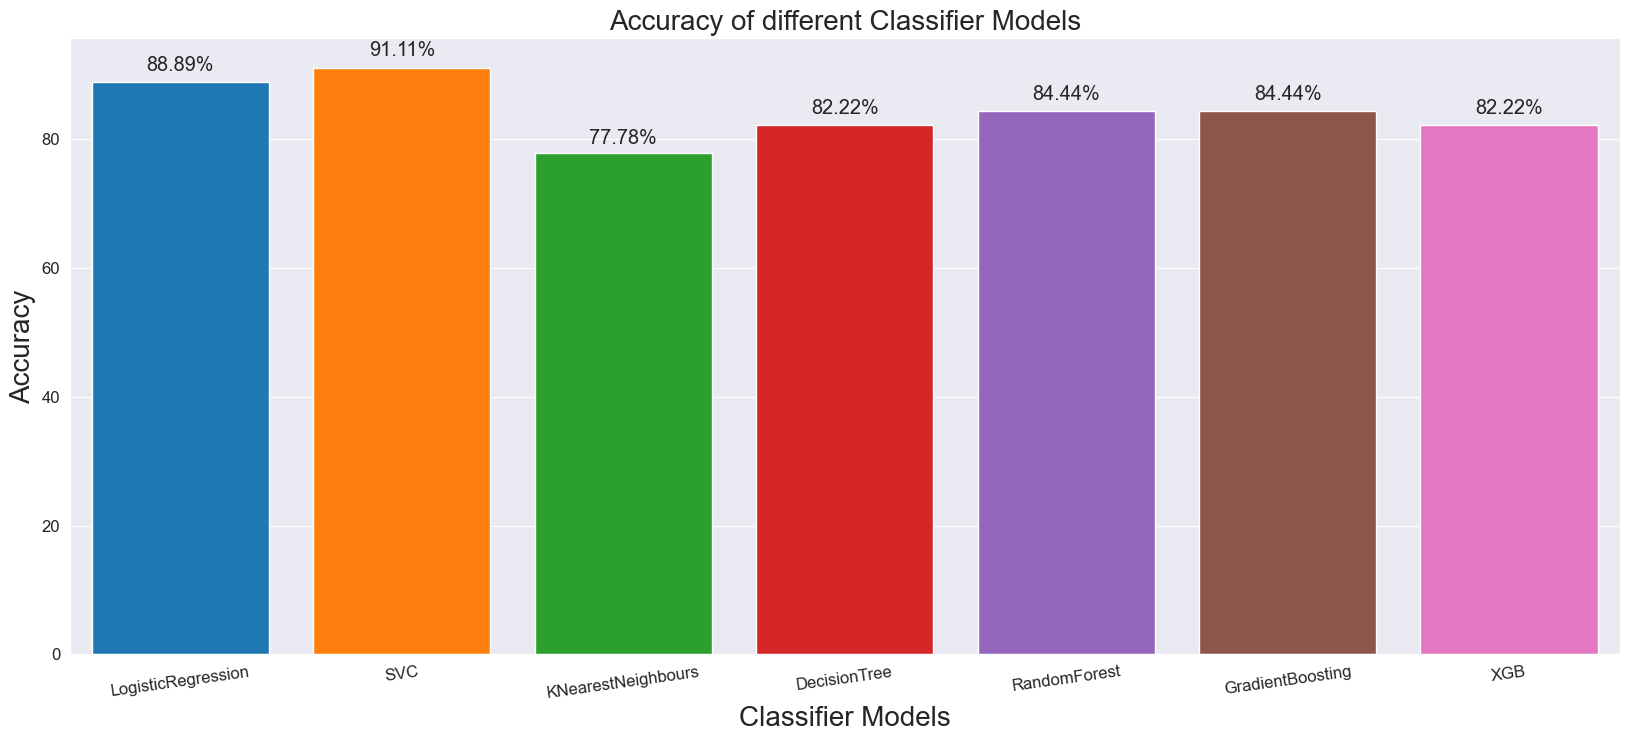

In [31]:
model_list = ['LogisticRegression', 'SVC','KNearestNeighbours', 'DecisionTree', 'RandomForest',
              'GradientBoosting','XGB']

plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "tab10", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [33]:
import joblib

joblib.dump(sv_clf, 'svc.joblib')

['svc.joblib']

**please give upvote if you found this notebook helpful...
Thanks!**